<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---

# 🌱 **기본 과제**

#### **N231 Part.2 모델 학습 부분까지 동일하게 과제를 수행합니다.**

In [1]:
!pip install category_encoders 
!pip install eli5 
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 2.1 MB/s 
     |████████████████████████████████| 133 kB 35.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9d61a3ff1dbf5aad893a5cfc8e82024e05cb49718603f5c20c8a83627d2df3a8
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requir

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from pdpbox.pdp import pdp_isolate, pdp_plot

## **Part 1. 데이터 준비**

- 어제 사용했던 데이터셋을 불러오세요.

- 타겟과 특성을 지정해 주세요. 
  - 타겟은 `Attrition`입니다.  
- 훈련/평가 데이터셋을 분리하세요.
  - 훈련/평가 데이터의 비율은 8:2로 합니다.
  - `random_state=42`로 설정합니다. 


In [3]:
# 데이터셋 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
target = 'Attrition'
features = df.columns.tolist()
features.remove(target)

In [13]:
X = df[features]
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Part 2. 모델 학습**

- 타겟 Label을 `No=0`, `Yes=1`로 변환하세요.
  - 훈련/평가 데이터 모두 변환합니다. 
- 훈련 데이터셋에 대하여 기준모델의 AUC score를 확인하세요.
  - 기준모델은 최빈값으로 만듭니다.
- `OrdinalEncoder()`를 사용하여 특성을 인코딩하세요. 
- `RandomForestClassifier()`를 사용하여 랜덤포레스트 모델을 학습하세요. 
  - `random_state=42`로 설정합니다. 
  - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.

In [10]:
le = LabelEncoder()
le.fit(['No', 'Yes'])
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [16]:
pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=3,
    )
)

In [18]:
cross_val_score(pipe, X_train, y_train, cv=10, n_jobs=-1, scoring='roc_auc').mean()

0.8014466486540357

## **Part 3. ICE PLOT**

- Test Set의 `100번째 샘플`을 사용해서 ICE Plot을 그려보세요.

- 아래 특성들에 대한 ICE Plot을 그려보고 특성 값이 변화함에 따라 타겟값이 하락하는 경향을 보이는 특성을 찾아보세요.

>`'JobSatisfaction'`

> `'DistanceFromHome'`

> `'JobInvolvement'`
 
> `'TotalWorkingYears'`

##### **Q1. Test Set의 100번째 샘플로 ICE Plot을 그려보고 특성 값이 변화함에 따라 타겟값이 하락하는 경향을 보여주는 특성을 모두 고르세요.**

In [23]:
X_test.iloc[[99]] # 100번째 샘플

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
433,46,Travel_Rarely,1125,Sales,10,3,Marketing,1,580,3,...,3,80,1,15,3,3,3,2,1,2


In [ ]:
pipe.fit(X_train, y_train)

In [24]:
datapoint = X_test.iloc[[99]].copy()

jobSatisfaction_range = range(X_test['JobSatisfaction'].min(), X_test['JobSatisfaction'].max()+1)
distanceFromHome_range = range(X_test['DistanceFromHome'].min(), X_test['DistanceFromHome'].max()+1)
jobInvolvement_range = range(X_test['JobInvolvement'].min(), X_test['JobInvolvement'].max()+1)
totalWorkingYears_range = range(X_test['TotalWorkingYears'].min(), X_test['TotalWorkingYears'].max()+1)
# 전부 int형

1. JobSatisfaction

In [34]:
result = []
for one in jobSatisfaction_range:
  datapoint['JobSatisfaction'] = one
  one_predict_proba = pipe.predict_proba(datapoint)[:, 1] # 1 클래스의 예측 확률
  result.append(one_predict_proba.item()) # (체크) .item() 기억해두기
result = np.array(result)
result -= result[0]

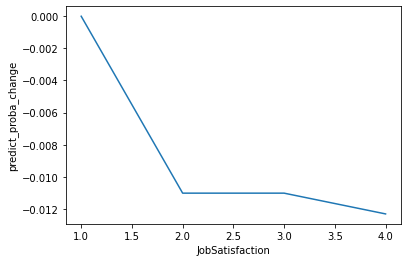

In [36]:
plt.plot(jobSatisfaction_range, result)
plt.xlabel('JobSatisfaction')
plt.ylabel('predict_proba_change')
plt.show()

2. DistanceFromHome

In [37]:
result = []
for one in distanceFromHome_range:
  datapoint['DistanceFromHome'] = one
  one_predict_proba = pipe.predict_proba(datapoint)[:, 1] # 1 클래스의 예측 확률
  result.append(one_predict_proba.item()) # (체크) .item() 기억해두기
result = np.array(result)
result -= result[0]

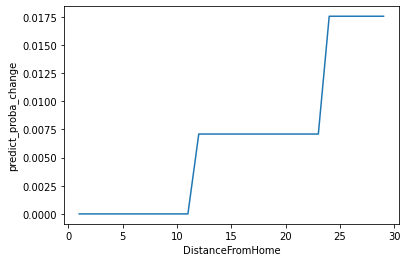

In [38]:
plt.plot(distanceFromHome_range, result)
plt.xlabel('DistanceFromHome')
plt.ylabel('predict_proba_change')
plt.show()

3. JobInvolvement

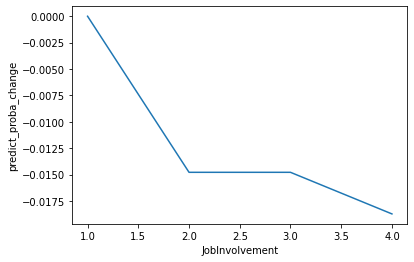

In [39]:
result = []
for one in jobInvolvement_range:
  datapoint['JobInvolvement'] = one
  one_predict_proba = pipe.predict_proba(datapoint)[:, 1] # 1 클래스의 예측 확률
  result.append(one_predict_proba.item()) # (체크) .item() 기억해두기
result = np.array(result)
result -= result[0]

plt.plot(jobInvolvement_range, result)
plt.xlabel('JobInvolvement')
plt.ylabel('predict_proba_change')
plt.show()

4. TotalWorkingYears

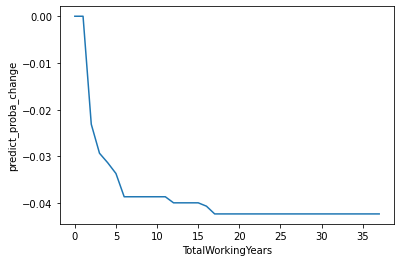

In [40]:
result = []
for one in totalWorkingYears_range:
  datapoint['TotalWorkingYears'] = one
  one_predict_proba = pipe.predict_proba(datapoint)[:, 1] # 1 클래스의 예측 확률
  result.append(one_predict_proba.item()) # (체크) .item() 기억해두기
result = np.array(result)
result -= result[0]

plt.plot(totalWorkingYears_range, result)
plt.xlabel('TotalWorkingYears')
plt.ylabel('predict_proba_change')
plt.show()

JobSatisfaction, JobInvolvement, TotalWorkingYears : 특성 값이 변화함에 따라 **타겟값이 하락**하는 경향

## **Part 4. PDP PLOT**

- `Job satisfaction` 특성을 사용해서 pdp plot을 그려보고 타겟값과의 관계를 설명하세요.


In [41]:
target_feature = 'JobSatisfaction'

In [42]:
isolated = pdp_isolate(
    model=pipe,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', # default
    num_grid_points=10  # default
)

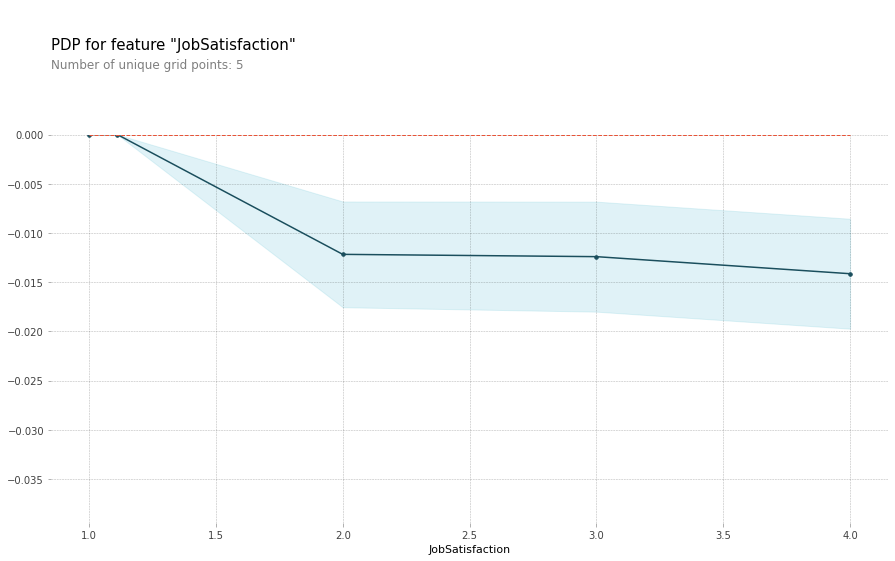

In [44]:
pdp_plot(isolated, feature_name=target_feature);

##### **Q2. `Job satisfaction` 특성을 사용해서 pdp plot을 그려보고 타겟값과의 관계를 설명하기 위해 아래 빈칸을 채워보세요.**

> Test Set를 사용해서 PDP plot을 그려보면 `Job satisfaction` 특성 값이 변화함에 따라 타겟값이 전체적으로 _____하는 경향성을 보인다.
1. 상승
2. 하락

  

In [ ]:
# 하락

# 🥇 **도전 과제**

## **Part 5. 프로젝트 준비**

> #### **이번 도전과제는 n231에 이어서 진행해보세요.**

- 지난 도전과제에서 지시한 바와 같이 프로젝트에 사용할 데이터셋을 불러오세요. 

- 모델링을 수행한 후 순열중요도를 구하고 상위 특성만 사용해서 모델을 최적화 해보세요.

- PDP를 사용해서 모델을 들여다보고 해석해보세요.